In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
train = "/content/drive/MyDrive/AI/nhandienkhuonmat/train"
validation = "/content/drive/MyDrive/AI/nhandienkhuonmat/validation"

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [6]:
label=['HoangBach','Messi','Ronaldo']

In [7]:
train_generator = train_data_gen.flow_from_directory(
    train,                                         
    target_size=(150, 150),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    validation,
    target_size=(150, 150),               
    class_mode='categorical')

Found 141 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [8]:

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

EPOCHS=30
history=model.fit(train_generator,batch_size=128,epochs=EPOCHS,verbose=1,validation_data=validation_generator)

Epoch 1/30
5/5 [==============================] - 47s 6s/step - loss: 1.1589 - acc: 0.4043 - val_loss: 1.0522 - val_acc: 0.4667
Epoch 2/30
5/5 [==============================] - 1s 210ms/step - loss: 0.8915 - acc: 0.6028 - val_loss: 0.6298 - val_acc: 0.6667
Epoch 3/30
5/5 [==============================] - 1s 176ms/step - loss: 0.6972 - acc: 0.7589 - val_loss: 1.1315 - val_acc: 0.8000
Epoch 4/30
5/5 [==============================] - 1s 210ms/step - loss: 0.5381 - acc: 0.8014 - val_loss: 0.3829 - val_acc: 0.8667
Epoch 5/30
5/5 [==============================] - 1s 214ms/step - loss: 0.4261 - acc: 0.8156 - val_loss: 0.4337 - val_acc: 0.6667
Epoch 6/30
5/5 [==============================] - 1s 175ms/step - loss: 0.3112 - acc: 0.8723 - val_loss: 0.4076 - val_acc: 0.8667
Epoch 7/30
5/5 [==============================] - 1s 187ms/step - loss: 0.3149 - acc: 0.8582 - val_loss: 0.3234 - val_acc: 0.8667
Epoch 8/30
5/5 [==============================] - 1s 183ms/step - loss: 0.2755 - acc: 0.8794

<Figure size 432x288 with 0 Axes>

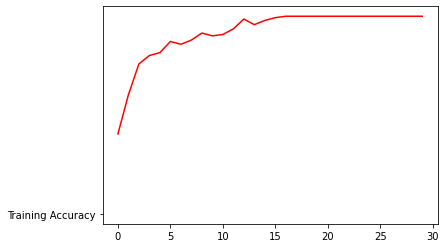

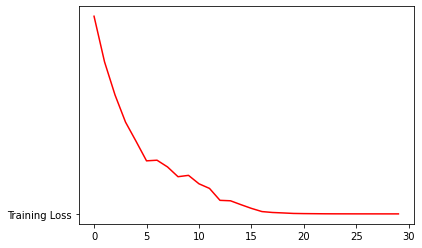

<Figure size 432x288 with 0 Axes>

In [10]:
from tensorflow.python.util.tf_export import InvalidSymbolNameError
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
accuracy = history.history['acc']
loss=history.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'r',"Training Accuracy")
plt.figure()
plt.plot(epochs,loss,'r',"Training Loss")
plt.figure()

In [11]:
score = model.evaluate(train_generator,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  0.0001595189532963559
Độ chính xác  1.0


Saving HoangBachTest.jpg to HoangBachTest.jpg
[[1. 0. 0.]]
Dự đoán:  HoangBach


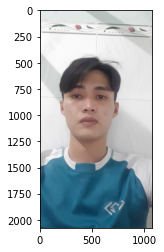

In [110]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])

Saving ronaldo (42).jpg to ronaldo (42) (1).jpg
[[0. 0. 1.]]
Dự đoán:  Ronaldo


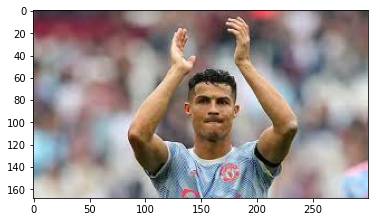

In [103]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])

Saving messi (51).jpg to messi (51) (1).jpg
[[0. 1. 0.]]
Dự đoán:  Messi


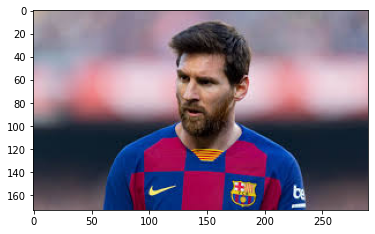

In [104]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])